<a href="https://colab.research.google.com/github/thenameisAnurag/SCOA/blob/main/SCOA_5_PSO_%2B_Clustering_with%20Warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Best score = 7.4132
Iteration 10: Best score = 7.2411
Iteration 20: Best score = 7.2411
Iteration 30: Best score = 7.2411
Iteration 40: Best score = 7.2411
Iteration 50: Best score = 7.2411
Iteration 60: Best score = 7.2411
Iteration 70: Best score = 7.2411
Iteration 80: Best score = 7.2411
Iteration 90: Best score = 7.2411


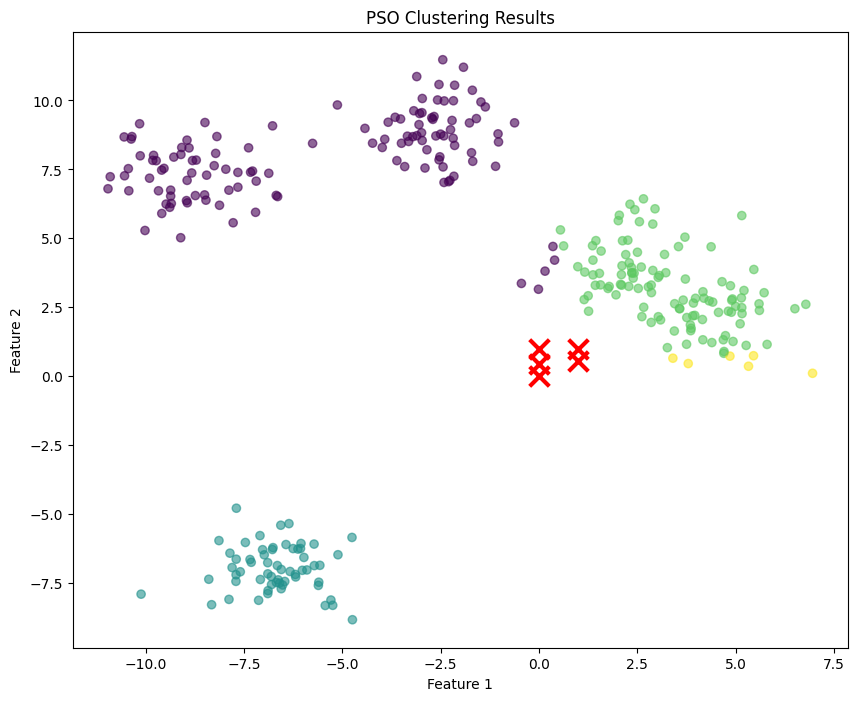


Clustering complete!
Final centroids:
[[0.         1.        ]
 [0.         0.45914365]
 [0.         0.        ]
 [1.         1.        ]
 [1.         0.53842857]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 5
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Particle class representing a candidate solution
class Particle:
    def __init__(self, n_clusters, n_features):
        self.position = np.random.rand(n_clusters, n_features)  # Random cluster centroids
        self.velocity = np.random.randn(n_clusters, n_features) * 0.1  # Small random velocities
        self.best_position = self.position.copy()
        self.best_score = float('inf')  # Initialize best score to infinity

# Fitness function: Calculate the mean of minimum distances between points and centroids
def fitness(particle, X):
    distances = np.sqrt(((X[:, np.newaxis, :] - particle.position[np.newaxis, :, :]) ** 2).sum(axis=2))
    min_distances = distances.min(axis=1)
    return np.mean(min_distances)

# Update velocity for a particle
def update_velocity(particle, global_best_position, w=0.5, c1=1, c2=1):
    r1, r2 = np.random.rand(2)  # Random coefficients
    cognitive = c1 * r1 * (particle.best_position - particle.position)  # Personal best component
    social = c2 * r2 * (global_best_position - particle.position)  # Global best component
    particle.velocity = w * particle.velocity + cognitive + social

# Update position of a particle
def update_position(particle):
    particle.position += particle.velocity
    particle.position = np.clip(particle.position, 0, 1)  # Constrain positions within bounds

# PSO clustering algorithm
def pso_clustering(X, n_clusters, n_particles=20, n_iterations=100):
    # Initialize particles
    particles = [Particle(n_clusters, X.shape[1]) for _ in range(n_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = float('inf')

    # Main PSO loop
    for iteration in range(n_iterations):
        for particle in particles:
            # Evaluate fitness
            score = fitness(particle, X)

            # Update personal best
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()

            # Update global best
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()

        # Update velocity and position of each particle
        for particle in particles:
            update_velocity(particle, global_best_position)
            update_position(particle)

        # Print progress
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Best score = {global_best_score:.4f}")

    return global_best_position

# Run PSO clustering
best_centroids = pso_clustering(X, n_clusters)

# Assign points to clusters based on closest centroids
distances = np.sqrt(((X[:, np.newaxis, :] - best_centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
cluster_assignments = distances.argmin(axis=1)

# Visualize results
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('PSO Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("\nClustering complete!")
print(f"Final centroids:\n{best_centroids}")


Iteration 0: Best score = 7.4414
Iteration 10: Best score = 7.2413
Iteration 20: Best score = 7.2413
Iteration 30: Best score = 7.2413
Iteration 40: Best score = 7.2413
Iteration 50: Best score = 7.2413
Iteration 60: Best score = 7.2413
Iteration 70: Best score = 7.2413
Iteration 80: Best score = 7.2413
Iteration 90: Best score = 7.2413


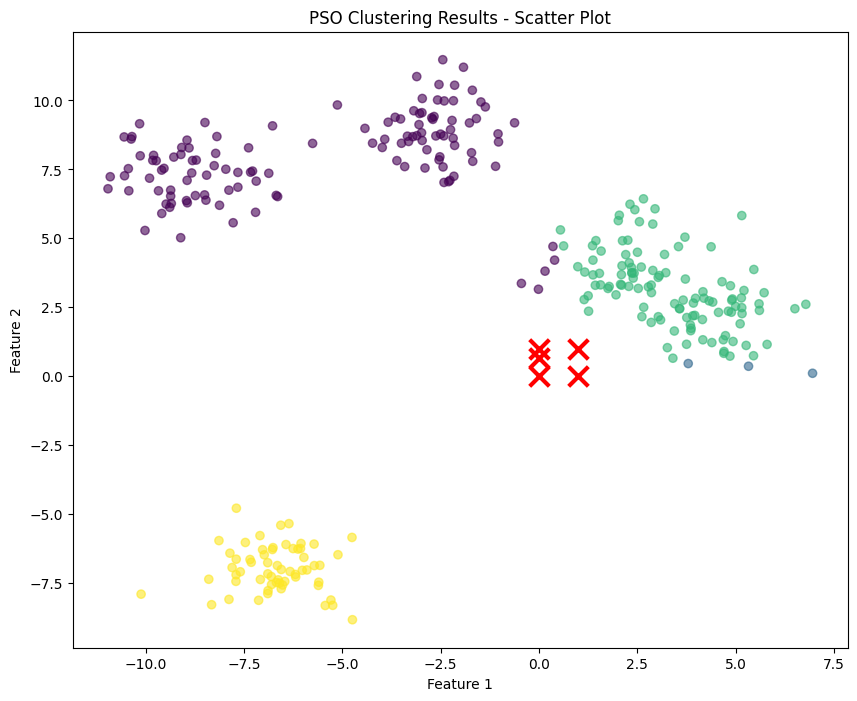

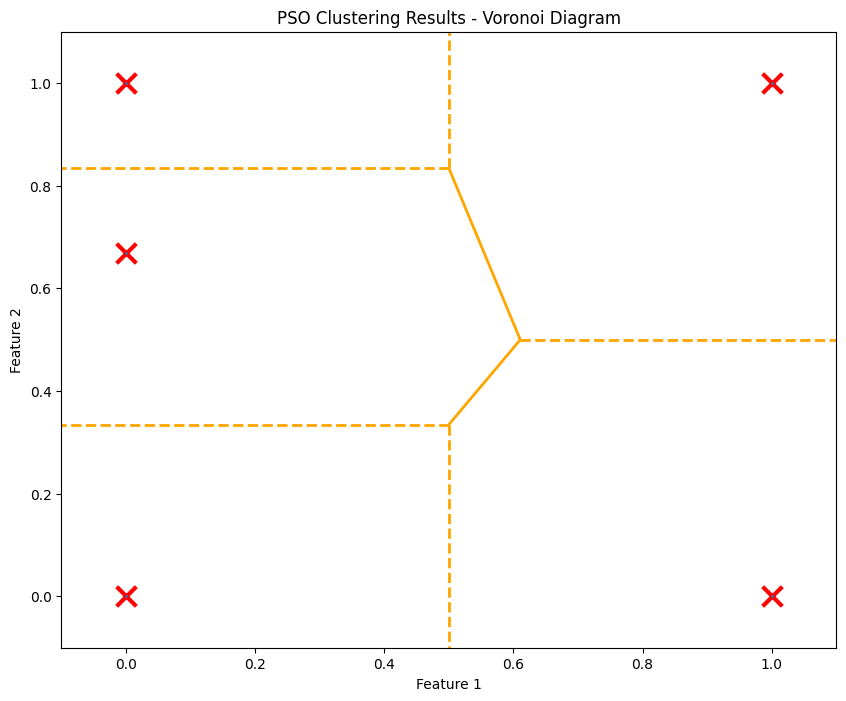


Clustering complete!
Final centroids:
[[0.         1.        ]
 [1.         0.        ]
 [1.         1.        ]
 [0.         0.        ]
 [0.         0.66903329]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 5
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Particle class representing a candidate solution
class Particle:
    def __init__(self, n_clusters, n_features):
        self.position = np.random.rand(n_clusters, n_features)  # Random cluster centroids
        self.velocity = np.random.randn(n_clusters, n_features) * 0.1  # Small random velocities
        self.best_position = self.position.copy()
        self.best_score = float('inf')  # Initialize best score to infinity

# Fitness function: Calculate the mean of minimum distances between points and centroids
def fitness(particle, X):
    distances = np.sqrt(((X[:, np.newaxis, :] - particle.position[np.newaxis, :, :]) ** 2).sum(axis=2))
    min_distances = distances.min(axis=1)
    return np.mean(min_distances)

# Update velocity for a particle
def update_velocity(particle, global_best_position, w=0.5, c1=1, c2=1):
    r1, r2 = np.random.rand(2)  # Random coefficients
    cognitive = c1 * r1 * (particle.best_position - particle.position)  # Personal best component
    social = c2 * r2 * (global_best_position - particle.position)  # Global best component
    particle.velocity = w * particle.velocity + cognitive + social

# Update position of a particle
def update_position(particle):
    particle.position += particle.velocity
    particle.position = np.clip(particle.position, 0, 1)  # Constrain positions within bounds

# PSO clustering algorithm
def pso_clustering(X, n_clusters, n_particles=20, n_iterations=100):
    # Initialize particles
    particles = [Particle(n_clusters, X.shape[1]) for _ in range(n_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = float('inf')

    # Main PSO loop
    for iteration in range(n_iterations):
        for particle in particles:
            # Evaluate fitness
            score = fitness(particle, X)

            # Update personal best
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()

            # Update global best
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()

        # Update velocity and position of each particle
        for particle in particles:
            update_velocity(particle, global_best_position)
            update_position(particle)

        # Print progress
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Best score = {global_best_score:.4f}")

    return global_best_position

# Run PSO clustering
best_centroids = pso_clustering(X, n_clusters)

# Assign points to clusters based on closest centroids
distances = np.sqrt(((X[:, np.newaxis, :] - best_centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
cluster_assignments = distances.argmin(axis=1)

# Visualization 1: Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('PSO Clustering Results - Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualization 2: Voronoi Diagram
def plot_voronoi(points, X, cluster_assignments):
    vor = Voronoi(points)
    fig, ax = plt.subplots(figsize=(10, 8))
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, point_size=2)
    ax.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6)
    ax.scatter(points[:, 0], points[:, 1], c='red', marker='x', s=200, linewidths=3)
    plt.title('PSO Clustering Results - Voronoi Diagram')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_voronoi(best_centroids, X, cluster_assignments)

print("\nClustering complete!")
print(f"Final centroids:\n{best_centroids}")


Iteration 0: Best score = 35.4551
Iteration 10: Best score = 23.4057
Iteration 20: Best score = 22.5435
Iteration 30: Best score = 22.2101
Iteration 40: Best score = 21.7798
Iteration 50: Best score = 21.3490
Iteration 60: Best score = 21.3421
Iteration 70: Best score = 21.3321
Iteration 80: Best score = 21.3201
Iteration 90: Best score = 21.3074


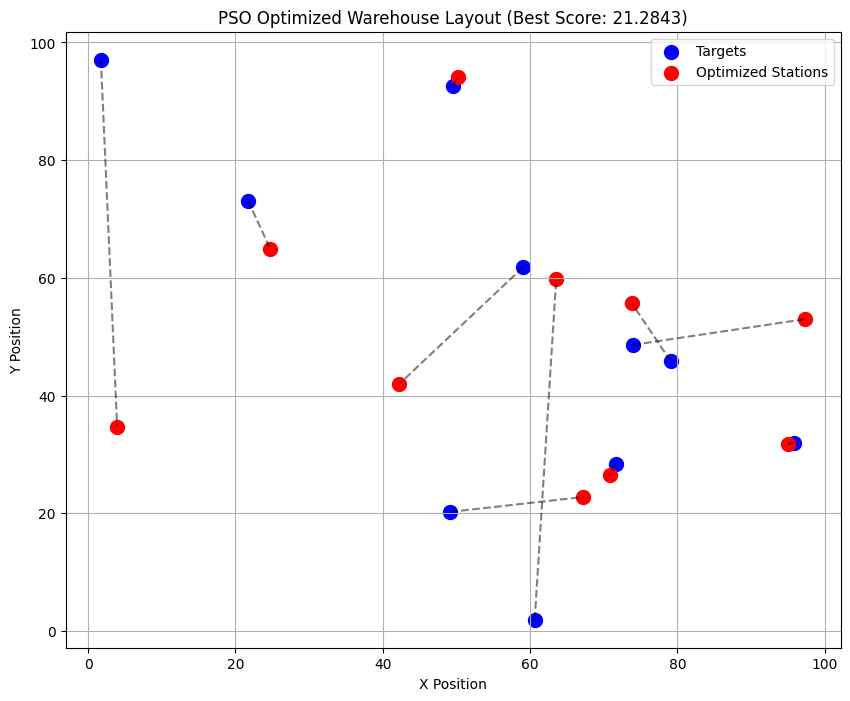


Optimization Complete!
Best Positions:
[[94.99757723 31.73412457]
 [63.54387038 59.76248944]
 [70.8661891  26.58018132]
 [67.22922288 22.78108387]
 [24.72152752 64.91031457]
 [97.37784987 53.00184426]
 [42.23807893 41.98066414]
 [50.20939367 94.16163165]
 [ 3.94026199 34.74674228]
 [73.7950151  55.72964007]]
Best Score (Average Distance): 21.2843


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the warehouse layout optimization problem
class WarehouseOptimization:
    def __init__(self, warehouse_size, n_stations):
        self.warehouse_size = warehouse_size  # Size of the warehouse (width, height)
        self.n_stations = n_stations  # Number of stations (e.g., shelves, workstations)
        self.stations = np.random.rand(n_stations, 2) * warehouse_size  # Random station positions
        self.targets = np.random.rand(n_stations, 2) * warehouse_size  # Random target positions

    def evaluate(self, positions):
        """
        Evaluate the fitness of the given positions of the stations.
        Fitness is defined as the average distance between stations and their targets.
        """
        distances = np.sqrt(((positions - self.targets) ** 2).sum(axis=1))
        return np.mean(distances)

# Particle class for PSO
class Particle:
    def __init__(self, n_stations, warehouse_size):
        self.position = np.random.rand(n_stations, 2) * warehouse_size  # Random station positions
        self.velocity = np.random.randn(n_stations, 2) * 0.1  # Small random initial velocity
        self.best_position = self.position.copy()
        self.best_score = float('inf')  # Initialize best score to infinity

# PSO algorithm
def pso_warehouse_optimization(warehouse, n_particles=20, n_iterations=100, w=0.5, c1=1.5, c2=1.5):
    particles = [Particle(warehouse.n_stations, warehouse.warehouse_size) for _ in range(n_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = float('inf')

    for iteration in range(n_iterations):
        for particle in particles:
            # Evaluate fitness
            score = warehouse.evaluate(particle.position)

            # Update personal best
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()

            # Update global best
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()

        # Update velocity and position of each particle
        for particle in particles:
            r1, r2 = np.random.rand(2)  # Random coefficients
            cognitive = c1 * r1 * (particle.best_position - particle.position)
            social = c2 * r2 * (global_best_position - particle.position)
            particle.velocity = w * particle.velocity + cognitive + social
            particle.position += particle.velocity

            # Ensure particles stay within warehouse bounds
            particle.position = np.clip(particle.position, 0, warehouse.warehouse_size)

        # Print progress
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Best score = {global_best_score:.4f}")

    return global_best_position, global_best_score

# Main function
if __name__ == "__main__":
    # Define warehouse size and number of stations
    warehouse_size = 100  # 100x100 units
    n_stations = 10  # 10 stations

    # Initialize the warehouse optimization problem
    warehouse = WarehouseOptimization(warehouse_size, n_stations)

    # Run PSO
    best_positions, best_score = pso_warehouse_optimization(warehouse)

    # Visualize the results
    plt.figure(figsize=(10, 8))
    plt.scatter(warehouse.targets[:, 0], warehouse.targets[:, 1], c='blue', label='Targets', s=100)
    plt.scatter(best_positions[:, 0], best_positions[:, 1], c='red', label='Optimized Stations', s=100)
    for i in range(n_stations):
        plt.plot([warehouse.targets[i, 0], best_positions[i, 0]],
                 [warehouse.targets[i, 1], best_positions[i, 1]], 'k--', alpha=0.5)

    plt.title(f"PSO Optimized Warehouse Layout (Best Score: {best_score:.4f})")
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid()
    plt.show()

    print("\nOptimization Complete!")
    print(f"Best Positions:\n{best_positions}")
    print(f"Best Score (Average Distance): {best_score:.4f}")
